In [22]:
import numpy as np
import pandas as pd
import os
import openpyxl
import tensorflow as tf
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from pandas import concat
from tensorflow.keras.layers import LSTM,Dense,GRU,Dropout,SimpleRNN
from sklearn.metrics import mean_squared_error
import random as rn
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.models import Sequential
# from keras.layers import Dense

In [23]:
seed_num =42
np.random.seed(seed_num)
rn.seed(seed_num)
tf.random.set_seed(seed_num)

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [25]:
# n_hours = 3
# n_features = 43
# #19 = 95개
# train_num_19 = 1933
# train_num_24 = 2789
# train_num_25 = 2892


In [26]:
# from google.colab import drive
filename = 'rain_data.xlsx'
df = pd.read_excel(filename)

In [27]:
n_hours = 3
n_features = 43
data_num = len(df)
train_num_15 = 1444
#16 = 205개
train_num_16 = 1649
#17 =125
train_num_17 = 1774
train_num_18 = 1839
train_num_19 = 1934
train_num_20 = 2198

train_num_21 = 2282
train_num_22 = 2567
train_num_23 = 2695
train_num_24 = 2789
train_num_25 = 2891
test_num = 160
print(data_num)

3051


# test data 따로 뽑기 

In [36]:
df_test = df
df_test = df_test[2891:]
df_test = df_test.drop('연', 1)
df_test = df_test.drop('dlf', 1)
df_test

,홍수사상번호,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
2891,26,7,1,6,NaN,14.2576,32,0,0,0,...,0,1.93,120.528,0.8413,32,0,1,0,1.93,120.515
2892,26,7,1,7,NaN,10.9657,20,1,0,0,...,8,1.93,120.524,4.7653,21,1,14,8,1.93,120.510
2893,26,7,1,8,NaN,7.9442,11,5,0,0,...,24,1.92,120.520,12.9398,21,5,19,24,1.92,120.505
2894,26,7,1,9,NaN,7.8916,3,11,0,0,...,33,1.92,120.516,19.6616,18,11,22,33,1.92,120.500
2895,26,7,1,10,NaN,13.3484,4,25,1,8,...,36,1.92,120.512,26.6211,20,25,23,36,1.92,120.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,7,7,17,NaN,2.3689,1,0,0,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26,7,7,18,NaN,2.3689,1,0,0,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26,7,7,19,NaN,2.3689,1,0,0,0,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26,7,7,20,NaN,2.3689,1,0,0,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [7]:
# df_metrix 만드는 과정
df_matrix = df.to_numpy()
# df_matrix = df_matrix[1:train_num_25, 5:]
df_matrix = df_matrix[0:train_num_25-1, 5:]
print(df_matrix)

df_matrix = df_matrix.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
df_matrix = scaler.fit_transform(df_matrix)

df_matrix


[[189.1         6.4         7.        ...   8.          2.54
  122.61     ]
 [216.9519618   6.3         7.        ...  10.          2.53
  122.6      ]
 [251.4244187   6.4         7.        ...  11.          2.53
  122.59     ]
 ...
 [502.8468429   8.2586      2.        ...   1.          3.
  137.145    ]
 [491.9548045   4.1089      1.        ...   1.          2.98
  137.155    ]
 [481.1030831   3.3854      1.        ...   1.          2.96
  137.165    ]]


array([[0.0086303 , 0.01948843, 0.0212766 , ..., 0.03065134, 0.09392971,
        0.15531301],
       [0.00992569, 0.01918392, 0.0212766 , ..., 0.03831417, 0.09329073,
        0.15491581],
       [0.01152899, 0.01948843, 0.0212766 , ..., 0.04214559, 0.09329073,
        0.1545186 ],
       ...,
       [0.02322259, 0.02514799, 0.00607903, ..., 0.00383142, 0.1233227 ,
        0.73267174],
       [0.022716  , 0.01251188, 0.00303951, ..., 0.00383142, 0.12204473,
        0.73306847],
       [0.02221129, 0.01030877, 0.00303951, ..., 0.00383142, 0.12076677,
        0.7334657 ]], dtype=float32)

In [8]:
# print(df_matrix)
lag = series_to_supervised(df_matrix, n_hours,1)

lag = lag.values

tmp = lag.shape[1]-42

lag = lag[:,0:tmp]
print(lag.shape)
lag

(2887, 130)


array([[0.0086303 , 0.01948843, 0.0212766 , ..., 0.09329073, 0.1545186 ,
        0.01391903],
       [0.00992569, 0.01918392, 0.0212766 , ..., 0.09329073, 0.15431976,
        0.01773149],
       [0.01152899, 0.01948843, 0.0212766 , ..., 0.09329073, 0.15392256,
        0.02367161],
       ...,
       [0.0245295 , 0.12846895, 0.04559271, ..., 0.12523963, 0.7320757 ,
        0.02322259],
       [0.02415942, 0.11118423, 0.03039514, ..., 0.1233227 , 0.73267174,
        0.022716  ],
       [0.02371195, 0.06937759, 0.01823708, ..., 0.12204473, 0.73306847,
        0.02221129]], dtype=float32)

# train data 갯수 설정하는 부분
기존에는 train19-> train23 으로 변경

In [9]:
n_train_hours = train_num_19
# n_train_hours = train_num_23
train = lag[:n_train_hours, :]
val = lag[n_train_hours:, :]

In [10]:
n_obs = n_hours * (n_features)
# train_X, train_y = train[:, :n_obs], train[:, -1]
train_X, train_y = train[:, :n_obs], train[:, -130]
print('train_X: ',train_X)
print('train_y: ',train_y)




val_X, val_y = val[:, :n_obs], val[:, -130]
print('test_y: ',val_y)
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, (n_features)))
val_X = val_X.reshape((val_X.shape[0], n_hours, (n_features)))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape)

train_X:  [[0.0086303  0.01948843 0.0212766  ... 0.04214559 0.09329073 0.1545186 ]
 [0.00992569 0.01918392 0.0212766  ... 0.05363984 0.09329073 0.15431976]
 [0.01152899 0.01948843 0.0212766  ... 0.06130268 0.09329073 0.15392256]
 ...
 [0.04307098 0.2631629  0.24012159 ... 0.02681992 0.05750799 0.4540224 ]
 [0.04249851 0.26284868 0.24012159 ... 0.02681992 0.05686902 0.4528308 ]
 [0.00279236 0.18509561 0.15197569 ... 0.02298851 0.05623004 0.45163918]]
train_y:  [0.0086303  0.00992569 0.01152899 ... 0.04307098 0.04249851 0.00279236]
test_y:  [0.0029034  0.00306621 0.00328673 0.00356898 0.00391646 0.00433212
 0.00481667 0.0053703  0.00599231 0.00667858 0.00742413 0.00822399
 0.0090722  0.00995883 0.01087298 0.0118037  0.0127398  0.01367008
 0.01458519 0.01548334 0.01636462 0.01722828 0.01807032 0.01888593
 0.01967005 0.02041674 0.02111983 0.02177456 0.02238178 0.02294373
 0.02346266 0.02394185 0.02438864 0.0248114  0.02521907 0.02562284
 0.02603448 0.02646333 0.02690901 0.02736873 0.027839

In [11]:
print(val_X)

[[[0.0029034  0.18509561 0.15197569 ... 0.02681992 0.05686902 0.4528308 ]
  [0.00306621 0.18225457 0.15197569 ... 0.02298851 0.05623004 0.45163918]
  [0.00328673 0.17842996 0.10942249 ... 0.01149425 0.05559106 0.45024872]]

 [[0.00306621 0.18225457 0.15197569 ... 0.02298851 0.05623004 0.45163918]
  [0.00328673 0.17842996 0.10942249 ... 0.01149425 0.05559106 0.45024872]
  [0.00356898 0.1756288  0.10638298 ... 0.         0.05559106 0.4490571 ]]

 [[0.00328673 0.17842996 0.10942249 ... 0.01149425 0.05559106 0.45024872]
  [0.00356898 0.1756288  0.10638298 ... 0.         0.05559106 0.4490571 ]
  [0.00391646 0.17459439 0.10638298 ... 0.         0.05495208 0.4478655 ]]

 ...

 [[0.0245295  0.12846895 0.04559271 ... 0.00383142 0.12779553 0.7308841 ]
  [0.02415942 0.11118423 0.03039514 ... 0.00383142 0.12651758 0.7314801 ]
  [0.02371195 0.06937759 0.01823708 ... 0.00383142 0.12523963 0.7320757 ]]

 [[0.02415942 0.11118423 0.03039514 ... 0.00383142 0.12651758 0.7314801 ]
  [0.02371195 0.06937759

In [12]:
val_y

array([0.0029034 , 0.00306621, 0.00328673, 0.00356898, 0.00391646,
       0.00433212, 0.00481667, 0.0053703 , 0.00599231, 0.00667858,
       0.00742413, 0.00822399, 0.0090722 , 0.00995883, 0.01087298,
       0.0118037 , 0.0127398 , 0.01367008, 0.01458519, 0.01548334,
       0.01636462, 0.01722828, 0.01807032, 0.01888593, 0.01967005,
       0.02041674, 0.02111983, 0.02177456, 0.02238178, 0.02294373,
       0.02346266, 0.02394185, 0.02438864, 0.0248114 , 0.02521907,
       0.02562284, 0.02603448, 0.02646333, 0.02690901, 0.02736873,
       0.02783915, 0.02831485, 0.02878983, 0.0292589 , 0.02971977,
       0.03017094, 0.03061086, 0.03103659, 0.03143933, 0.03180888,
       0.03213602, 0.03241565, 0.0326437 , 0.03281746, 0.03293991,
       0.03301542, 0.03304791, 0.03303949, 0.03299185, 0.03290625,
       0.03278228, 0.03261913, 0.03241601, 0.03217133, 0.03188044,
       0.03153792, 0.03114028, 0.03069182, 0.03019876, 0.02966739,
       0.02910425, 0.02851594, 0.02790901, 0.02728967, 0.02666

In [13]:
train_y

array([0.0086303 , 0.00992569, 0.01152899, ..., 0.04307098, 0.04249851,
       0.00279236], dtype=float32)

Text(0, 0.5, 'AMOUNT')

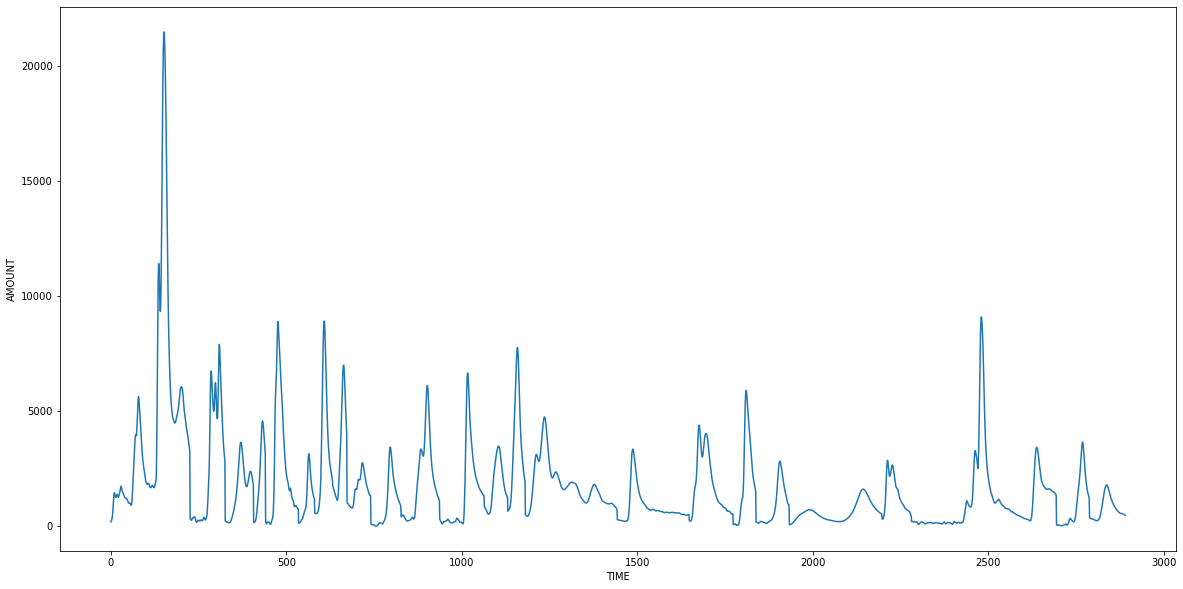

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(df['유입량'])
plt.xlabel('TIME')
plt.ylabel('AMOUNT')

In [15]:
model = tf.keras.Sequential()
model.add(LSTM(20, input_shape=(train_X.shape[1],train_X.shape[2]), activation='tanh', return_sequences=False))
model.add(Dense(1))

2021-09-11 18:15:09.735098: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-09-11 18:15:09.750872: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faaf4ad8f60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-11 18:15:09.750888: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [16]:
# import os
# from keras import optimizers

optimizer = tf.keras.optimizers.Adam(lr=0.0001)

model.compile(loss='mean_squared_error', optimizer='adam')
#early_stop = EarlyStopping(monitor='val_loss', patience=3)
#model_path = 'model'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(train_X, train_y, 
                                    epochs=100, 
                                    batch_size=32,
                                    validation_data=(val_X, val_y), 
                                    )

Epoch 1/100
61/61 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 8.7081e-04
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 9.6544e-04 - val_loss: 7.5312e-04
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 6.2001e-04 - val_loss: 5.5800e-04
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 4.7635e-04 - val_loss: 5.2188e-04
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: 4.0010e-04 - val_loss: 4.5704e-04
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 3.4556e-04 - val_loss: 3.8637e-04
Epoch 7/100
61/61 [==============================] - 0s 3ms/step - loss: 3.2127e-04 - val_loss: 4.2657e-04
Epoch 8/100
61/61 [==============================] - 0s 3ms/step - loss: 3.7929e-04 - val_loss: 3.8936e-04
Epoch 9/100
61/61 [==============================] - 0s 3ms/step - loss: 2.6631e-04 - val_loss: 3.4405e-04
Epoch 10/100
61/61 [=====================

Epoch 77/100
61/61 [==============================] - 0s 2ms/step - loss: 5.0823e-05 - val_loss: 6.5163e-05
Epoch 78/100
61/61 [==============================] - 0s 2ms/step - loss: 4.4514e-05 - val_loss: 1.0755e-04
Epoch 79/100
61/61 [==============================] - 0s 2ms/step - loss: 4.6960e-05 - val_loss: 6.3926e-05
Epoch 80/100
61/61 [==============================] - 0s 2ms/step - loss: 4.7707e-05 - val_loss: 5.2921e-05
Epoch 81/100
61/61 [==============================] - 0s 2ms/step - loss: 3.1844e-05 - val_loss: 7.2445e-05
Epoch 82/100
61/61 [==============================] - 0s 3ms/step - loss: 4.3600e-05 - val_loss: 5.5940e-05
Epoch 83/100
61/61 [==============================] - 0s 2ms/step - loss: 5.4957e-05 - val_loss: 5.3592e-05
Epoch 84/100
61/61 [==============================] - 0s 3ms/step - loss: 5.9819e-05 - val_loss: 5.1937e-05
Epoch 85/100
61/61 [==============================] - 0s 2ms/step - loss: 4.2907e-05 - val_loss: 7.4663e-05
Epoch 86/100
61/61 [========

In [17]:
#model.load_weights(filename)
pred = model.predict(val_X)
pred.shape

(953, 1)

In [18]:
RMSE = mean_squared_error(val_y,pred)**0.5
RMSE

0.007056778818475767

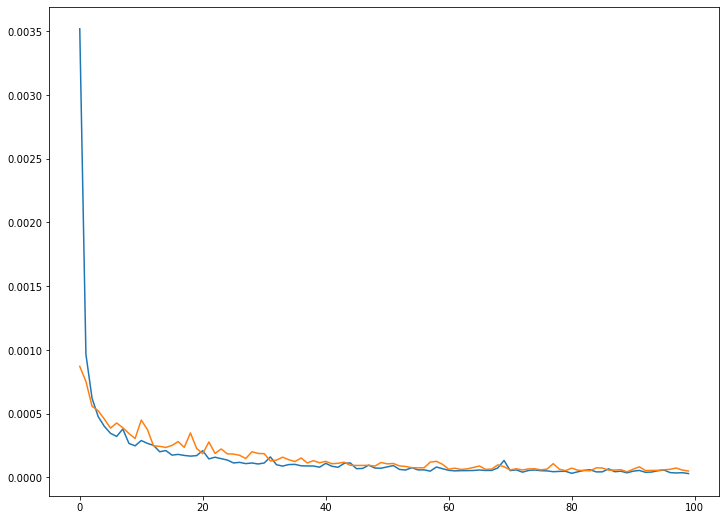

In [19]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()

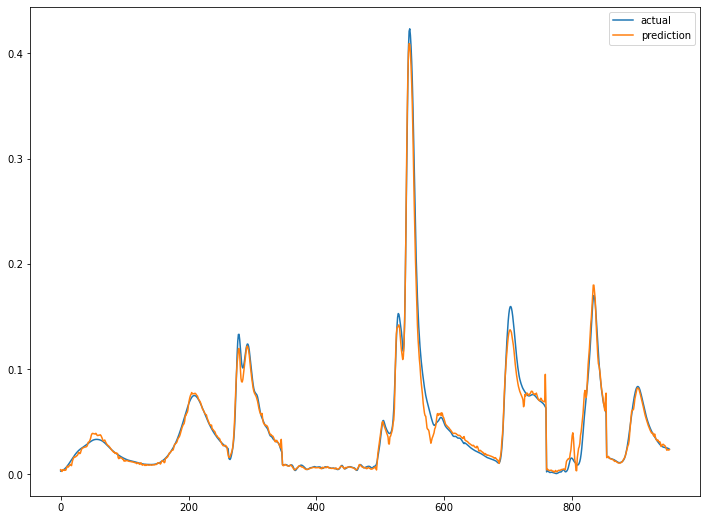

In [20]:
plt.figure(figsize=(12, 9))
plt.plot(val_y, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()